
# Partie 5 – Localisation de formes

## Imports & configuration

In [1]:
import os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from dataset import ShapesDataset
from model import EncoderDecoder
from utils import iou_score, dice_score, load_model


## Partie 1 – Forme simple

### 1.1 Génération du dataset

In [2]:
if os.path.exists("shapes_dataset"):
    print("Dataset forme simple déjà généré")
else:
    print("Génération du dataset forme simple...")
    !python dataset_generator.py


Génération du dataset forme simple...
Génération des images...
Dataset généré dans : shapes_dataset
Création du split train/val/test...
Split terminé !
Train : 2100 images
Val   : 450 images
Test  : 450 images



100%|██████████| 3000/3000 [00:04<00:00, 624.23it/s] 


### 1.2 Chargement

In [3]:
train_set = ShapesDataset(
    img_dir="shapes_dataset/train/images",
    mask_dir="shapes_dataset/train/masks"
)

val_set = ShapesDataset(
    img_dir="shapes_dataset/val/images",
    mask_dir="shapes_dataset/val/masks"
)

train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=16, shuffle=False)


### 1.3 Modèle Encoder–Decoder

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = EncoderDecoder().to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


### 1.4 Entraînement

In [5]:
def train(model, loader, optimizer, criterion, device, epochs=10):
    model.train()

    for epoch in range(epochs):
        loss_epoch = 0.0

        for x, y in loader:
            x, y = x.to(device), y.to(device)

            pred = model(x)
            loss = criterion(pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_epoch += loss.item()

        avg_loss = loss_epoch / len(loader)
        print(f"Epoch {epoch+1}/{epochs} | loss = {avg_loss:.4f}")

train(model, train_loader, optimizer, criterion, device, epochs=15)

Epoch 1/15 | loss = 0.0816
Epoch 2/15 | loss = 0.0127
Epoch 3/15 | loss = 0.0103
Epoch 4/15 | loss = 0.0091
Epoch 5/15 | loss = 0.0083
Epoch 6/15 | loss = 0.0079
Epoch 7/15 | loss = 0.0076
Epoch 8/15 | loss = 0.0074
Epoch 9/15 | loss = 0.0072
Epoch 10/15 | loss = 0.0071
Epoch 11/15 | loss = 0.0069
Epoch 12/15 | loss = 0.0067
Epoch 13/15 | loss = 0.0065
Epoch 14/15 | loss = 0.0064
Epoch 15/15 | loss = 0.0062


### 1.5 Sauvegarde du modèle

In [6]:
os.makedirs("checkpoints", exist_ok=True)

simple_ckpt_path = os.path.join(
    "checkpoints",
    "encoder_decoder_simple.pt"
)

torch.save(model.state_dict(), simple_ckpt_path)

print(f"Modèle forme simple sauvegardé : {simple_ckpt_path}")


Modèle forme simple sauvegardé : checkpoints\encoder_decoder_simple.pt


### 1.6 Visualisation des résultats

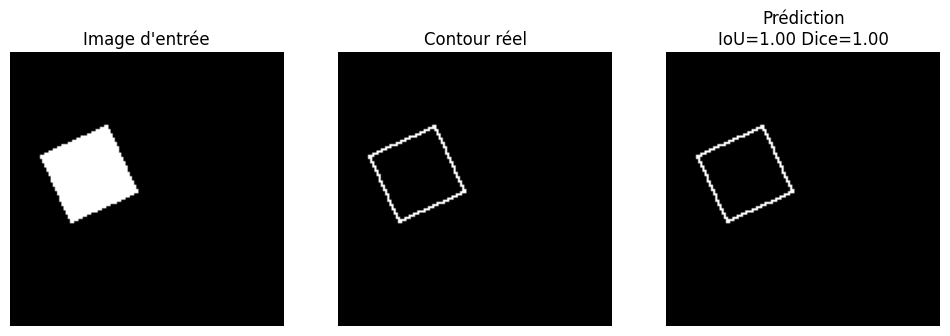

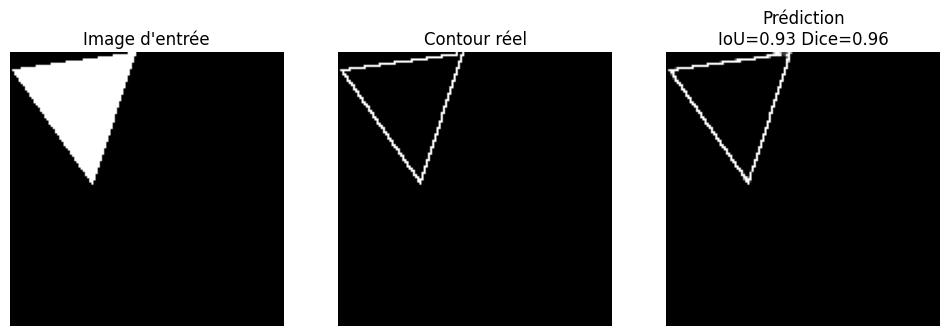

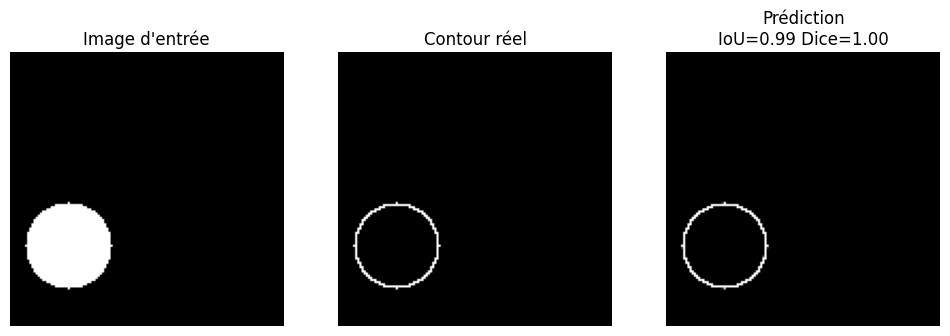

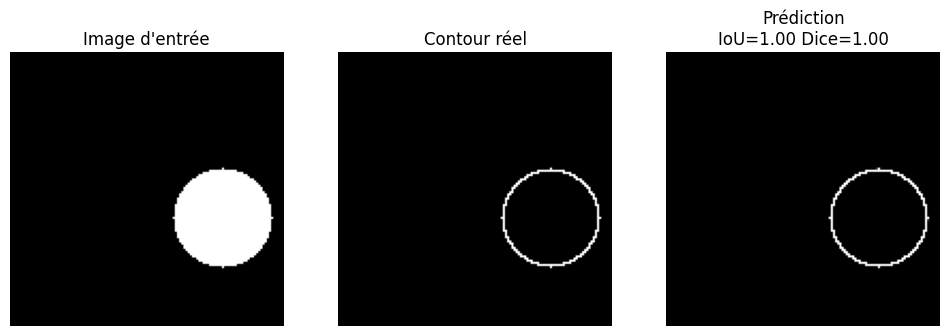

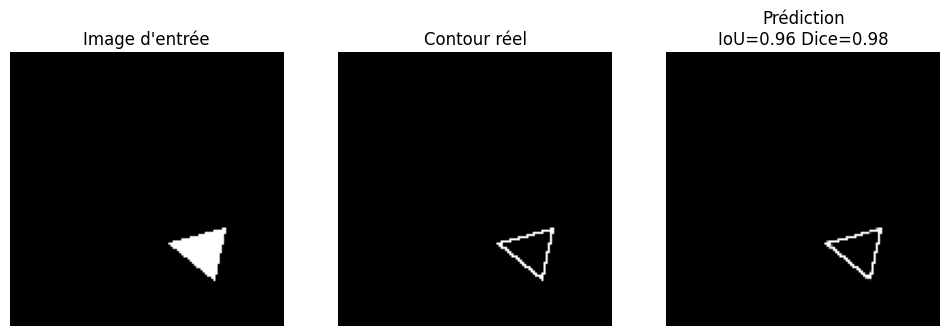

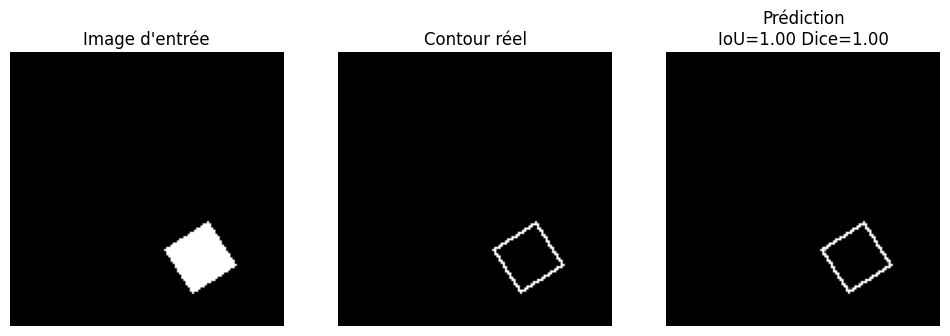

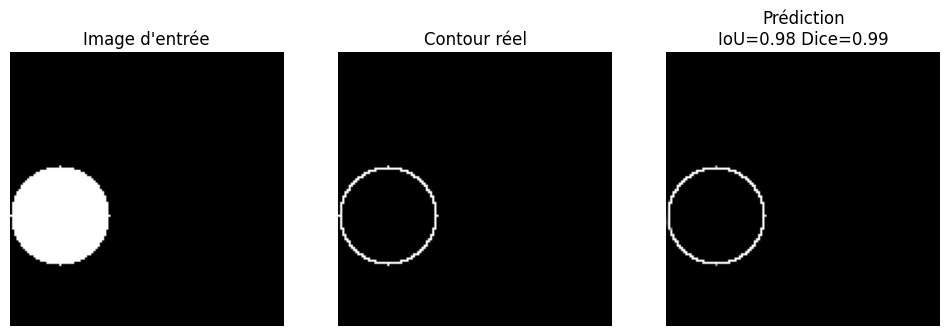

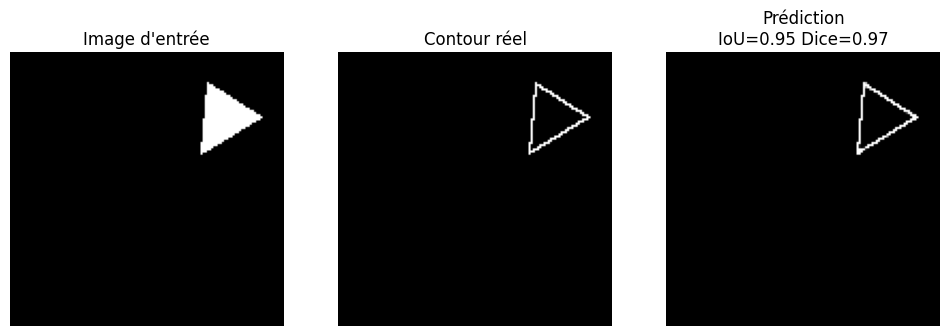

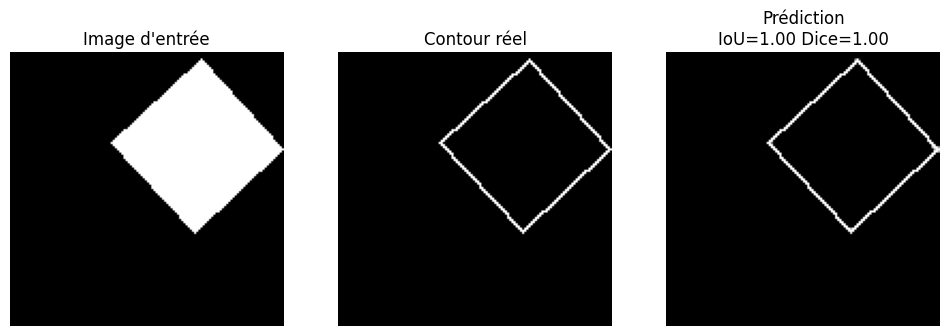

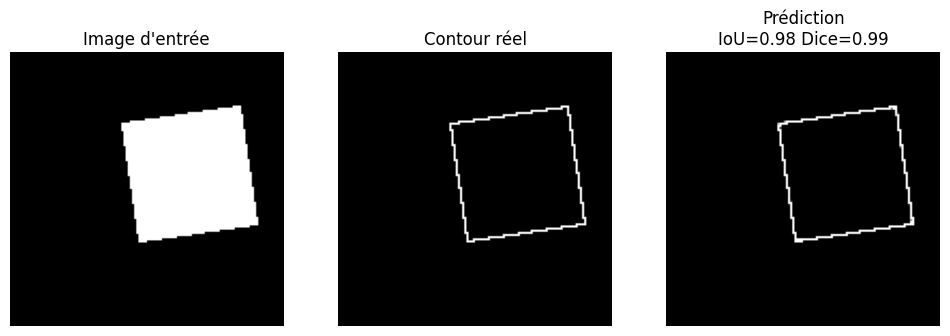

In [18]:
model_visu = load_model(simple_ckpt_path, device)

model_visu.eval()

imgs, masks = next(iter(val_loader))
imgs, masks = imgs.to(device), masks.to(device)

with torch.no_grad():
    preds = model_visu(imgs)

for i in range(10):
    iou = iou_score(preds[i], masks[i]).item()
    dice = dice_score(preds[i], masks[i]).item()

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(imgs[i][0].cpu(), cmap="gray")
    ax[0].set_title("Image d'entrée")

    ax[1].imshow(masks[i][0].cpu(), cmap="gray")
    ax[1].set_title("Contour réel")

    ax[2].imshow(preds[i][0].cpu(), cmap="gray")
    ax[2].set_title(f"Prédiction\nIoU={iou:.2f} Dice={dice:.2f}")

    for a in ax:
        a.axis("off")

    plt.show()


## Partie 2 – Multi-formes

### 2.1 Génération du dataset multi-formes

In [10]:
if os.path.exists("shapes_multi"):
    print("Dataset multi formes simple déjà généré")
else:
    print("Génération du dataset multi formes ...")
    !python dataset_generator_multi.py


Génération du dataset forme simple...
Génération des images multi-formes...
Images générées.
Création du split train/val/test...
Split terminé !
Train : 2100 images
Val   : 450 images
Test  : 450 images



100%|██████████| 3000/3000 [00:03<00:00, 782.33it/s]


### 2.2 Chargement du dataset

In [11]:
train_set_m = ShapesDataset(
    img_dir="shapes_multi/train/images",
    mask_dir="shapes_multi/train/masks"
)

val_set_m = ShapesDataset(
    img_dir="shapes_multi/val/images",
    mask_dir="shapes_multi/val/masks"
)

train_loader_m = DataLoader(train_set_m, batch_size=16, shuffle=True)
val_loader_m   = DataLoader(val_set_m, batch_size=16, shuffle=False)


### 2.3 Entraînement

In [14]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = EncoderDecoder().to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


train(model, train_loader, optimizer, criterion, device, epochs=15)


Epoch 1/15 | loss = 0.0706
Epoch 2/15 | loss = 0.0086
Epoch 3/15 | loss = 0.0051
Epoch 4/15 | loss = 0.0031
Epoch 5/15 | loss = 0.0020
Epoch 6/15 | loss = 0.0014
Epoch 7/15 | loss = 0.0011
Epoch 8/15 | loss = 0.0009
Epoch 9/15 | loss = 0.0007
Epoch 10/15 | loss = 0.0006
Epoch 11/15 | loss = 0.0005
Epoch 12/15 | loss = 0.0005
Epoch 13/15 | loss = 0.0004
Epoch 14/15 | loss = 0.0004
Epoch 15/15 | loss = 0.0030


### 2.4 Sauvegarde du modèle

In [15]:
os.makedirs("checkpoints", exist_ok=True)

multi_ckpt_path = os.path.join(
    "checkpoints",
    "encoder_decoder_multi.pt"
)

torch.save(model.state_dict(), multi_ckpt_path)

print(f"Modèle forme multi sauvegardé : {multi_ckpt_path}")

Modèle forme multi sauvegardé : checkpoints\encoder_decoder_multi.pt


### 2.6 Visualisation multi-formes

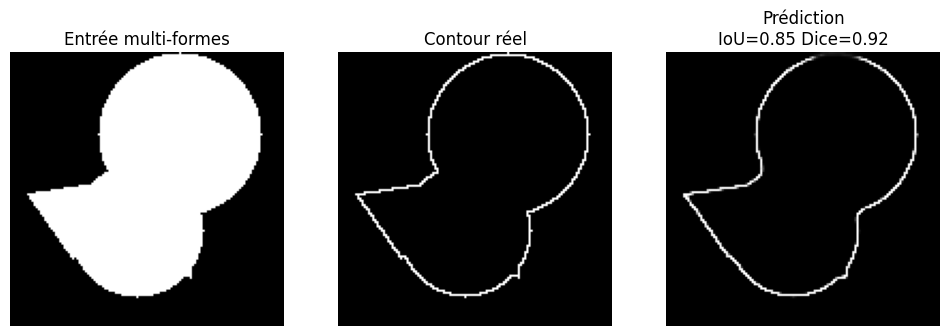

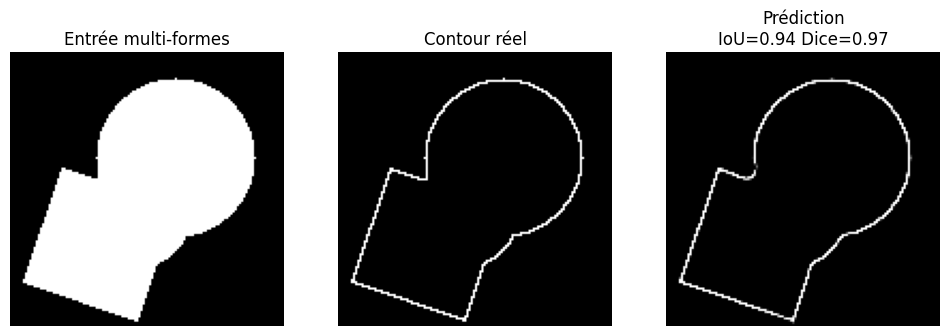

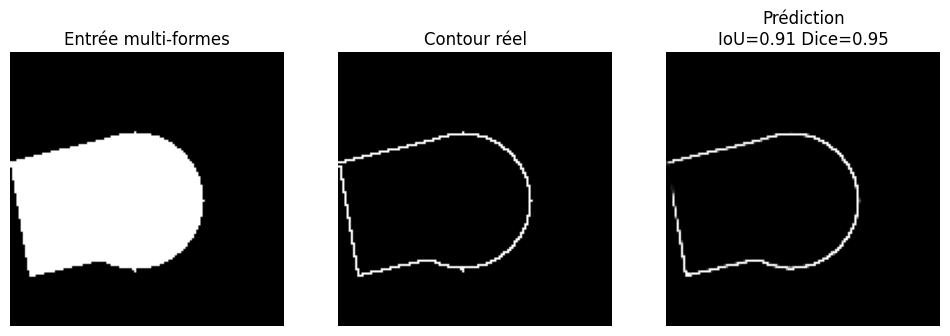

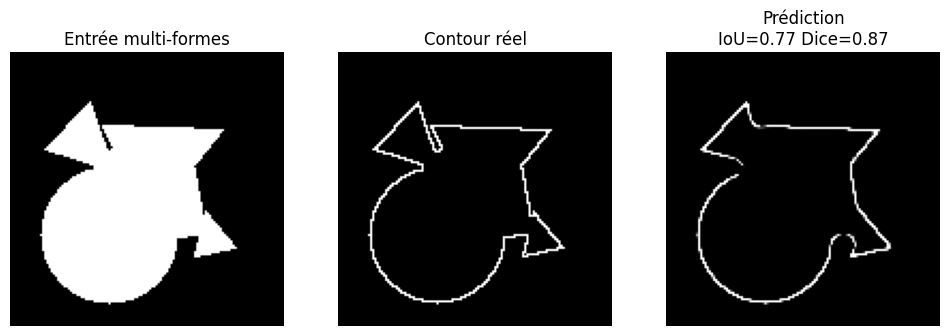

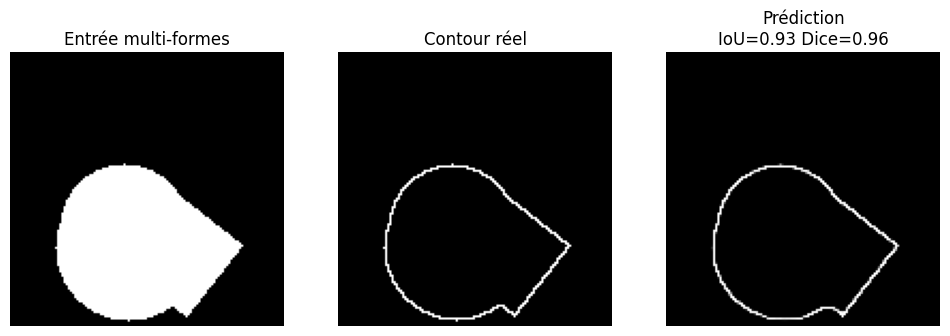

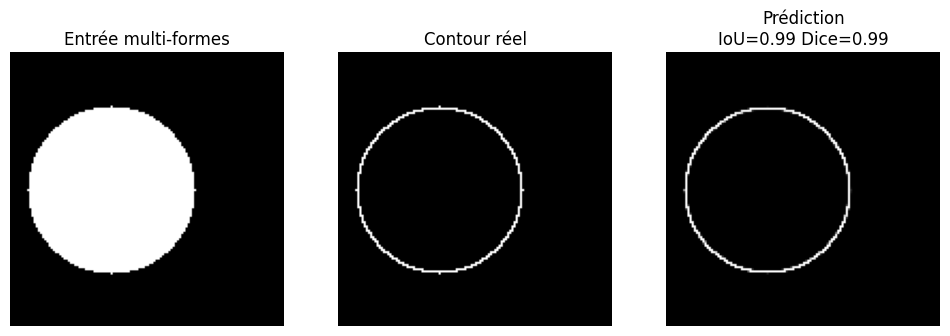

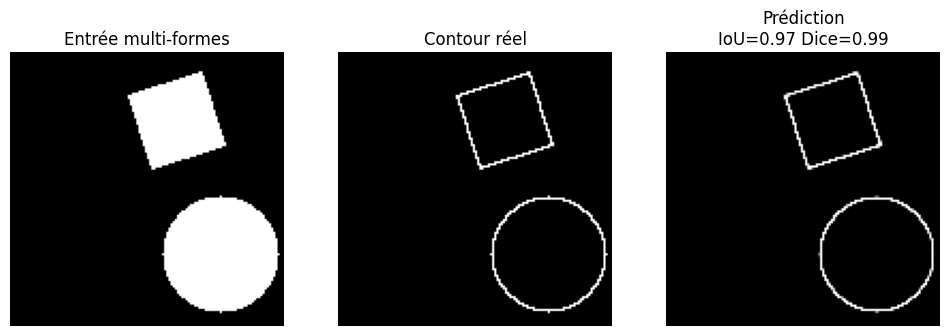

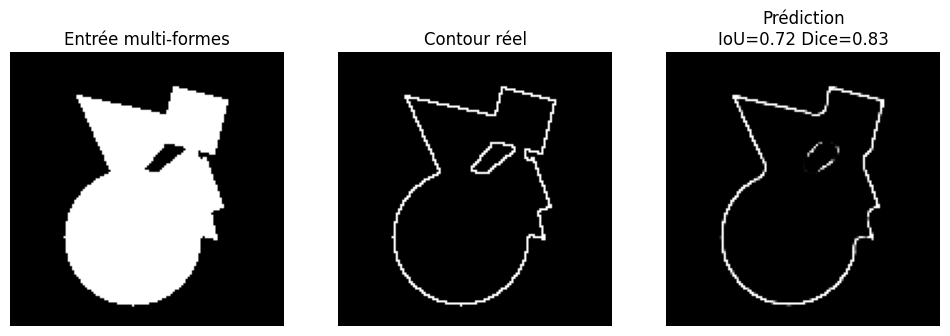

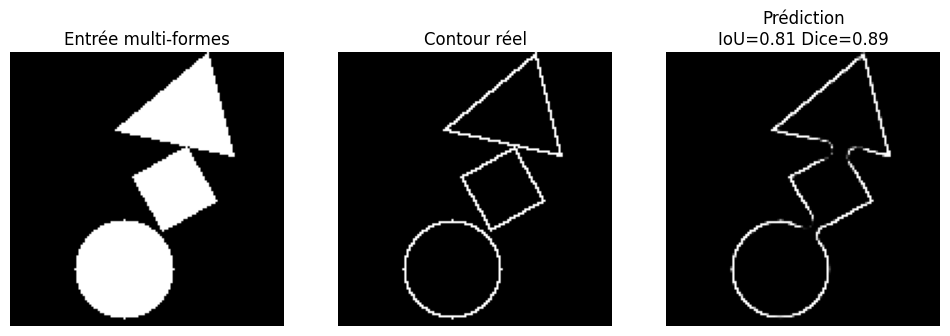

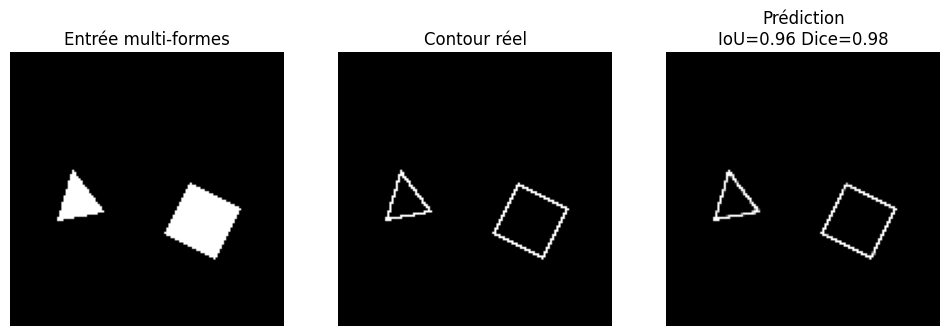

In [17]:
model_visu = load_model(multi_ckpt_path, device)

model_visu.eval()

imgs, masks = next(iter(val_loader_m))
imgs, masks = imgs.to(device), masks.to(device)

with torch.no_grad():
    preds = model_visu(imgs)

for i in range(10):
    iou = iou_score(preds[i], masks[i]).item()
    dice = dice_score(preds[i], masks[i]).item()

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    ax[0].imshow(imgs[i][0].cpu(), cmap="gray")
    ax[0].set_title("Entrée multi-formes")

    ax[1].imshow(masks[i][0].cpu(), cmap="gray")
    ax[1].set_title("Contour réel")

    ax[2].imshow(preds[i][0].cpu(), cmap="gray")
    ax[2].set_title(f"Prédiction\nIoU={iou:.2f} Dice={dice:.2f}")

    for a in ax:
        a.axis("off")

    plt.show()
